### CUSTOMER DATA PREPROCESSING

#### Importing the neccessary libraries

In [1]:
# Importing the necessary libraries
import csv
import json

In [2]:
# Open the CSV file and read the data
with open('acw_user_data.csv') as csv_file:
    reader = csv.reader(csv_file, delimiter=',')

#### Organising all the user data

In [3]:
def read_user_data(filename):
    all_users = []

    try:
        with open(filename) as csv_file:
            reader = csv.reader(csv_file, delimiter=',')
            next(reader)  # Skip the header row

            for row in reader:
                address = {
                    "street": row[0],
                    "city": row[1],
                    "postcode": row[2]
                }

                vehicle = {
                    "make": row[19],
                    "model": row[20],
                    "year": int(row[21]),
                    "type": row[22]
                }

                credit_card = {
                    "start_date": row[6],
                    "expiry_date": row[7],
                    "number": row[8],
                    "cvv": int(row[9]),
                    "iban": row[12]
                }

                user_info = {
                    "first_name": row[11],
                    "second_name": row[13],
                    "age": int(row[3]),
                    "sex": row[18],
                    "retired": row[16],
                    "marital_status": row[14],
                    "dependents": row[10],
                    "salary": float(row[17]),
                    "pension": float(row[15]),
                    "company": row[5],
                    "commute_distance": float(row[4]),
                    "vehicle": vehicle,
                    "Credit Card": credit_card,
                    "address": address
                }

                all_users.append(user_info)
                
    except FileNotFoundError:
        print(f"File {filename} not found.")
    except ValueError as e:
        print(f"Error in data format: {e}")

    return all_users

In [4]:
# Calling the function and assigning to the 'all_users' variable
all_users = read_user_data('acw_user_data.csv')

In [5]:
# Printing out all the users
all_users

[{'first_name': 'Kieran',
  'second_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': 'True',
  'marital_status': 'married or civil partner',
  'dependents': '3',
  'salary': 72838.0,
  'pension': 7257.0,
  'company': 'N/A',
  'commute_distance': 0.0,
  'vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': 2009,
   'type': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'expiry_date': '11/27',
   'number': '676373692463',
   'cvv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'}},
 {'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': 'False',
  'marital_status': 'married or civil partner',
  'dependents': '1',
  'salary': 54016.0,
  'pension': 0.0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'vehicle': {'make': 'Nissan', 'model': 'ATS', 'year': 1996, 'type': 'Coupe'},
  'Credit Card': {'start_date': '08/12',


#### Finding rows with missing dependants

In [6]:
class ProblematicRowFinder:
    def __init__(self, filename):
        self.filename = filename
        self.rows_with_issues = []

    def identify_issues(self):
        try:
            with open(self.filename) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')

                for row_number, row in enumerate(csv_reader):
                    # Check for missing or blank dependents field
                    if row[10].strip() == "":
                        row[10] = "Check Empty Value!"  # Replacing empty field with a placeholder
                        self.rows_with_issues.append((row_number))  # Store row number

        except FileNotFoundError:
            print(f"File {self.filename} not found.")
        except Exception as e:
            print(f"An error occurred: {e}")
        
        return self.rows_with_issues

    def display_problematic_rows(self):
        issues = self.identify_issues()
        print("Rows with missing dependents field:", issues)

In [7]:
# Calling the function and assigning to the 'finder' variable
finder = ProblematicRowFinder('acw_user_data.csv')
finder.display_problematic_rows()

Rows with missing dependents field: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


#### Writing/Saving the list of users in JSON format

The code below writes the contents of the users list to a JSON file named 'processed.json'.

In [8]:
# write users list to processed.json file

with open('processed.json', 'w') as file:
    json.dump(all_users, file, indent = 4)

#### Categorizing users by employment status

In [9]:
def categorize_users_by_employment_status(users, retired_filename, employed_filename):
    """
    Categorizes users into retired and employed groups and saves them into separate JSON files.

    :param users: List of user dictionaries.
    :param retired_filename: Filename to save retired users' data.
    :param employed_filename: Filename to save employed users' data.
    """
    retired_users = [user for user in users if user["retired"].lower() == "true"]
    employed_users = [user for user in users if user["retired"].lower() != "true"]

    save_to_json(retired_users, retired_filename)
    save_to_json(employed_users, employed_filename)

def save_to_json(data, filename):
    """
    Saves the given data into a JSON file with the specified filename.

    :param data: Data to be saved.
    :param filename: Filename for the JSON file.
    """
    with open(filename, "w") as file:
        json.dump(data, file, indent=4)

In [10]:
categorize_users_by_employment_status(all_users, 'retired.json', 'employed.json')

#### Extracting users with expired credit card 

In [11]:
def is_credit_card_expired(credit_card_info):
    """
    Checks if the credit card is expired based on its start and expiry dates.

    :param credit_card_info: Dictionary containing credit card details.
    :return: True if the credit card is expired, False otherwise.
    """
    start_month, start_year = map(int, credit_card_info['start_date'].split('/'))
    end_month, end_year = map(int, credit_card_info['expiry_date'].split('/'))
    total_months = (end_year - start_year) * 12 + (end_month - start_month)

    return total_months > 120  # More than 10 years

def save_to_json(data, filename):
    """
    Saves the given data into a JSON file with the specified filename.

    :param data: Data to be saved.
    :param filename: Filename for the JSON file.
    """
    with open(filename, "w") as file:
        json.dump(data, file, indent=4)

flagged_users = []

for index, user in enumerate(all_users):
    if is_credit_card_expired(user['Credit Card']):
        # print each flagged row
        print(f'User at index {index} has been flagged for an expired credit card')
        flagged_users.append(user)

if flagged_users:
    save_to_json(flagged_users, 'remove_ccard.json')
    print(f'\n{len(flagged_users)} users flagged and written to remove_ccard.json')
else:
    print('No users with expired credit cards found.')

# Call this with the list of users

User at index 1 has been flagged for an expired credit card
User at index 6 has been flagged for an expired credit card
User at index 7 has been flagged for an expired credit card
User at index 15 has been flagged for an expired credit card
User at index 23 has been flagged for an expired credit card
User at index 30 has been flagged for an expired credit card
User at index 32 has been flagged for an expired credit card
User at index 34 has been flagged for an expired credit card
User at index 35 has been flagged for an expired credit card
User at index 40 has been flagged for an expired credit card
User at index 41 has been flagged for an expired credit card
User at index 51 has been flagged for an expired credit card
User at index 52 has been flagged for an expired credit card
User at index 53 has been flagged for an expired credit card
User at index 55 has been flagged for an expired credit card
User at index 56 has been flagged for an expired credit card
User at index 63 has been f

#### Extracting users based on salary and commute information

In [12]:
class CommuteSalaryAnalyzer:
    def __init__(self, filename):
        """
        Initializes the analyzer by loading user data from a JSON file.

        :param filename: The path to the JSON file containing user data.
        """
        try:
            with open(filename) as file:
                self.users = json.load(file)
        except FileNotFoundError:
            print(f"File {filename} not found")
            self.users = []
        except json.JSONDecodeError:
            print("Error decoding JSON from the file")
            self.users = []

    def compute_salary_to_commute_ratio(self):
        """
        Calculates the salary to commute ratio for each user and sorts the users based on this ratio.
        """
        try:
            for user in self.users:
                user['Salary-Commute'] = self.calculate_ratio(user['salary'], user['commute_distance'])

            self.users.sort(key=lambda user: user['Salary-Commute'])
        except KeyError as e:
            print(f"Missing data for calculation: {e}")
    
    @staticmethod
    def calculate_ratio(salary, commute_distance):
        """
        Calculates the salary to commute distance ratio.

        :param salary: The salary of the user.
        :param commute_distance: The commute distance of the user.
        :return: The calculated ratio.
        """
        return salary if commute_distance <= 1 else salary / commute_distance

    def display_salary_commute_ratios(self):
        """
        Prints the salary to commute ratio for each user.
        """
        for user in self.users:
            print(f"Salary-Commute Ratio for {user['first_name']} {user['second_name']}: {user['Salary-Commute']}")

    def save_to_file(self, filename):
        """
        Saves the updated user data with salary to commute ratios to a file.

        :param filename: Filename to save the updated data.
        """
        try:
            with open(filename, "w") as file:
                json.dump(self.users, file, indent=4)
        except Exception as e:
            print(f"Error occurred while saving to file: {e}")

In [13]:
analyzer = CommuteSalaryAnalyzer('processed.json')
analyzer.compute_salary_to_commute_ratio()
analyzer.display_salary_commute_ratios()
analyzer.save_to_file('commute.json')

Salary-Commute Ratio for Graeme Jackson: 3088.04347826087
Salary-Commute Ratio for Janet Quinn: 3090.070921985816
Salary-Commute Ratio for Peter Burton: 3090.5017921146955
Salary-Commute Ratio for Paula Patel: 3090.9252669039147
Salary-Commute Ratio for Lynda Gill: 3094.0663176265266
Salary-Commute Ratio for Stacey Armstrong: 3094.316163410302
Salary-Commute Ratio for Michelle Williams: 3097.0790378006873
Salary-Commute Ratio for Elliott Brown: 3097.560975609756
Salary-Commute Ratio for Charlie Taylor: 3097.9238754325256
Salary-Commute Ratio for Ashley Sullivan: 3098.9672977624787
Salary-Commute Ratio for Mohammad Dawson: 3099.1438356164385
Salary-Commute Ratio for Shaun Williams: 3100.1712328767126
Salary-Commute Ratio for Irene Welch: 3101.2048192771085
Salary-Commute Ratio for Jodie O'Brien: 3105.387205387205
Salary-Commute Ratio for Bryan Stevenson: 3105.912162162162
Salary-Commute Ratio for Yvonne Moore: 3106.2184873949577
Salary-Commute Ratio for Sarah Crawford: 3109.060955518945

## Data Visualisation Using Pandas and Seaborn


#### Importing necessary libraries

In [14]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('acw_user_data.csv')
data.head(5)

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [16]:
# Display the statistical summary of the numerical columns in the dataframe
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age (Years),1000.0,5.430200e+01,2.131965e+01,1.800000e+01,3.600000e+01,5.400000e+01,7.200000e+01,9.100000e+01
Distance Commuted to Work (Km),1000.0,1.045777e+01,6.951997e+00,0.000000e+00,5.637500e+00,1.217000e+01,1.626250e+01,2.034000e+01
Credit Card Number,1000.0,4.188020e+17,1.304208e+18,6.041600e+10,3.857314e+13,3.510666e+15,4.635909e+15,4.967327e+18
Credit Card CVV,1000.0,9.324820e+02,1.626125e+03,2.000000e+00,2.770000e+02,5.595000e+02,8.332500e+02,9.977000e+03
Dependants,981.0,2.135576e+00,9.777987e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Yearly Pension (GBP),1000.0,5.875413e+03,1.098651e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.611700e+04
Yearly Salary (GBP),1000.0,5.781408e+04,2.327042e+04,1.704600e+04,3.908975e+04,5.751800e+04,7.721150e+04,9.891500e+04
Vehicle Year,1000.0,2.006927e+03,8.211035e+00,1.992000e+03,2.000000e+03,2.008000e+03,2.014000e+03,2.020000e+03


In [17]:
salary = data['Yearly Salary (GBP)']

In [18]:
age = data['Age (Years)']

#### Mean and median ages

In [19]:
mean_salary = salary.mean()
print("The Mean salary is ", mean_salary)

The Mean salary is  57814.078


In [20]:
median_age = age.median()
print("The Median age is ", median_age)

The Median age is  54.0


#### Age distribution

In [21]:
data.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (Km)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

In [22]:
def plot_age_distribution(age, bin_width=5):
    """
    Plots the distribution of ages as a histogram.

    :param Age: A Pandas Series or list containing age data.
    :param bin_width: Width of each bin in the histogram.
    """
    # Calculate the number of bins
    num_bins = int((max(age) - min(age)) // bin_width)

    # Create the histogram using Seaborn
    age_histogram = sns.histplot(age, bins=num_bins)

    # Add labels and title
    age_histogram.set_xlabel('Age (Years)')
    age_histogram.set_ylabel('Age Counts')
    age_histogram.set_title('Distribution of Age (Years)')

    # Display the plot
    plt.show()

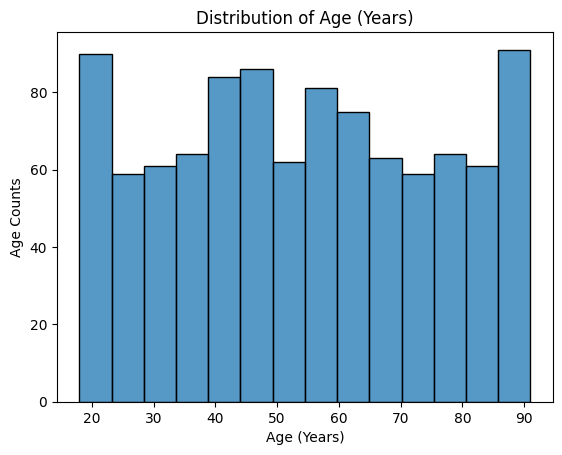

In [23]:
plot_age_distribution(data['Age (Years)'])

#### Dependants

In [24]:
print(data['Dependants'].unique())

[ 3.  1.  2.  4. nan  5.]


In [25]:
print(data['Dependants'].value_counts())

Dependants
2.0    460
1.0    255
3.0    178
4.0     54
5.0     34
Name: count, dtype: int64


In [26]:
# find the sum of null values in the 'Dependants' column
data['Dependants'].isnull().sum()

19

In [27]:
# Drop all rows that have null values in the 'Dependant' column.
data = data.dropna(subset=['Dependants'])

In [28]:
# Check if there are still null values
data['Dependants'].isnull().sum()

0

Plot saved as count_of_dependants.png


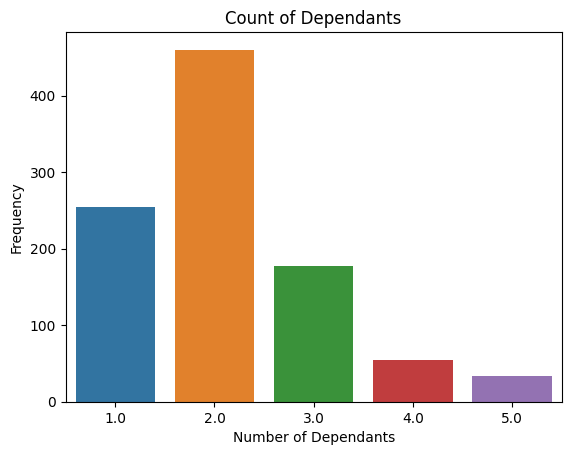

In [29]:
# Creating a count plot for the 'Dependants' column
dependants_plot = sns.countplot(x='Dependants', data=data)

# Setting labels and title
dependants_plot.set_xlabel('Number of Dependants')
dependants_plot.set_ylabel('Frequency')
dependants_plot.set_title('Count of Dependants')

# Saving the plot to a file
plt.savefig('count_of_dependants.png')
print("Plot saved as count_of_dependants.png")

# Displaying the plot
plt.show()

#### Plotting age based on marital status

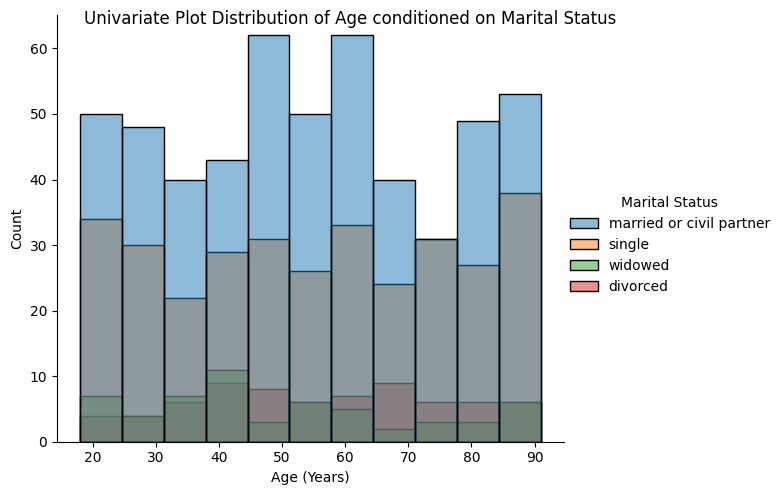

In [30]:
plot = sns.displot(
    data=data, 
    x="Age (Years)", 
    hue="Marital Status", 
    kind="hist")

plot.fig.suptitle("Univariate Plot Distribution of Age conditioned on Marital Status")
plot.fig.subplots_adjust(right=0.8)  # Adjusting subplot to make room for legend
# This uses the legend method of the FacetGrid object
plot.legend.set_bbox_to_anchor((1.1, 0.5))  # places the legend to the right of the plot
plot.savefig('age_marital_status.png')

plt.show()

#### Plotting and saving scatterplots

In [31]:
data.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (Km)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

In [32]:
def plot_scatter(df, x_col, y_col, hue_col=None, title="", filename=None):
    """
    Plots a scatter plot with the given DataFrame and column names, and saves it.

    :param data: Pandas DataFrame containing the data.
    :param x_col: Name of the column to be used for the x-axis.
    :param y_col: Name of the column to be used for the y-axis.
    :param hue_col: Name of the column  to be used for coloring points.
    :param title: Title of the plot.
    :param filename: Filename where the plot should be saved. 
    """
    # Create the scatter plot
    if hue_col:
        scatter_plot = sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col)
    else:
        scatter_plot = sns.scatterplot(data=data, x=x_col, y=y_col)

    plt.title(title)

    # Save the plot if a filename is provided
    if filename:
        plt.savefig(filename)
        print(f"Plot saved to {filename}")

    plt.show()

Plot saved to commute_salary.png


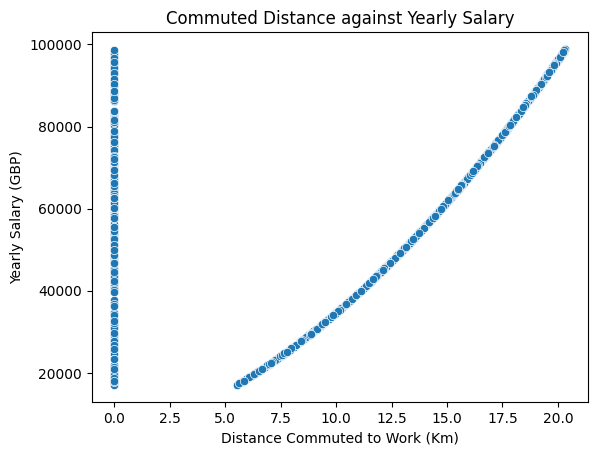

Plot saved to age_salary.png


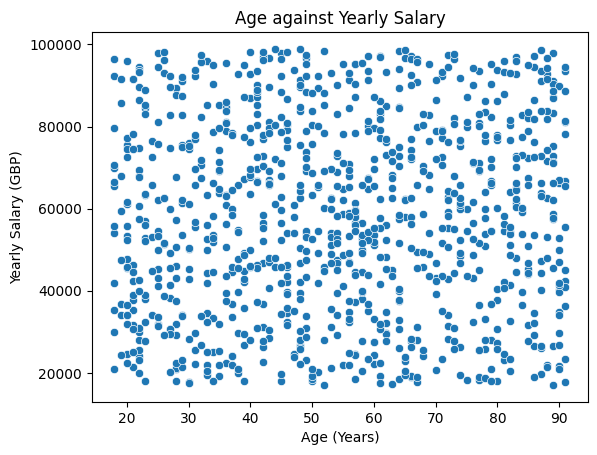

Plot saved to age_salary_dep.png


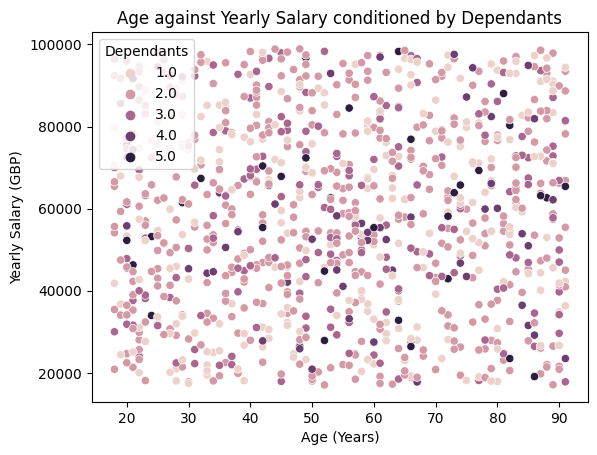

In [33]:
# Plot and save the scatterplots
plot_scatter(data, 'Distance Commuted to Work (Km)', 'Yearly Salary (GBP)', title="Commuted Distance against Yearly Salary", filename="commute_salary.png")
plot_scatter(data, 'Age (Years)', 'Yearly Salary (GBP)', title="Age against Yearly Salary", filename="age_salary.png")
plot_scatter(data, 'Age (Years)', 'Yearly Salary (GBP)', hue_col="Dependants", title="Age against Yearly Salary conditioned by Dependants", filename="age_salary_dep.png")